# Create Figures (Part I)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from scipy.optimize import brentq
%matplotlib inline

# Ionization front density jump

The density jump in a ionization front is given by:

\begin{equation}
    \frac{\rho_i}{\rho_0} = \frac{1}{2}\frac{c^2_0}{c^2_i}\left[\mathcal{M}^2 + 1 \pm \left(\left(\mathcal{M}^2 + 1\right)^2 -4\mathcal{M}^2\frac{c^2_i}{c^2_0}\right)^{1/2}\right]
\end{equation}
Where $\rho_x$ is the density of the "x" medium, $0$ for neutral medium ani $i$ for the ionized medium. $\mathcal{M}$ is the Mach number of the neutral medium and $c_x$ is the sound speed of the "x" medium

In [2]:
ci = 10
c0 = 2
cr = ci/c0

In [3]:
Mr = cr*(1 + np.sqrt(1 - 1./cr**2))
Md = cr*(1 - np.sqrt(1 - 1./cr**2))
Ms = np.logspace(-3, np.log10(Md), 100)
MS = np.logspace(np.log10(Mr), 3, 100)
sns.set_style("whitegrid")

In [4]:
def D(M):
    """
    Discriminant of jump density function
    """
    return np.sqrt((M**2+1)**2 - 4*(M*cr)**2)

In [5]:
Xdw = 0.5/cr**2*(Ms**2 + 1 - D(Ms))
Xds = 0.5/cr**2*(Ms**2 + 1 + D(Ms))
Xrw = 0.5/cr**2*(MS**2 + 1 - D(MS))
Xrs = 0.5/cr**2*(MS**2 + 1 + D(MS))

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


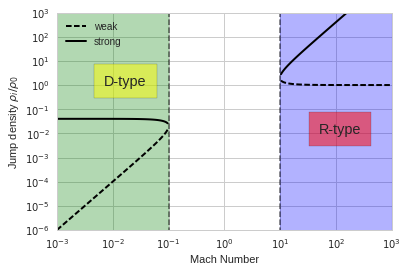

In [6]:
plt.plot(Ms, Xdw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Xds, lw=2, c="k", linestyle="-")
plt.plot(MS, Xrw, lw=2, c="k", linestyle="--")
plt.plot(MS, Xrs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-6, 1e3)
plt.text(0.007, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(50, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel(r"Jump density $\rho_i/\rho_0$")
plt.savefig("./Figures/IF-types.pdf")

## Velocity Jump

The jump velocity can be easiliy derived from continuity equation:
\begin{equation}
\mathcal{M}_i = \mathcal{M}\frac{c_0}{c_i}\frac{\rho_0}{\rho_i}
\end{equation}

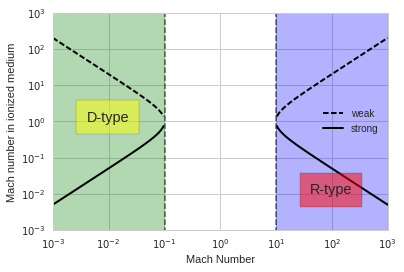

In [7]:
Midw = Ms/(cr*Xdw)
Mids = Ms/(cr*Xds)
Mirw = MS/(cr*Xrw)
Mirs = MS/(cr*Xrs)
plt.plot(Ms, Midw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Mids, lw=2, c="k", linestyle="-")
plt.plot(MS, Mirw, lw=2, c="k", linestyle="--")
plt.plot(MS, Mirs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-3, 1e3)
plt.text(0.004, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(40, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel("Mach number in ionized medium")
plt.savefig("./Figures/IF-vel-jump.pdf")